<a href="https://colab.research.google.com/github/Jihwan98/2021-2/blob/main/DeepLearning/study/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [ ]:
input_img = Input(shape=(np.prod(x_train.shape[1:]),))
encoded = Dense(32, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='rmsprop',loss='binary_crossentropy')

In [ ]:
autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_test[0].shape

(784,)

In [ ]:
input_test = x_test[0].reshape(1,784)
test_img = x_test[0].reshape(28,28)

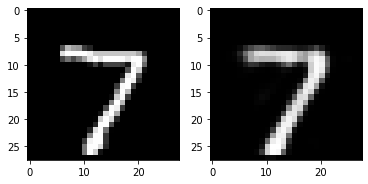

In [ ]:
predict = autoencoder.predict(input_test).reshape(28,28)

import matplotlib.pyplot as plt
plt.subplot(121)
plt.imshow(test_img, cmap='gray')
plt.subplot(122)
plt.imshow(predict, cmap='gray')
plt.show()

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [ ]:
conv_input = Input(shape=(28,28,1))
encoder = Conv2D(16,(3,3), activation='relu', padding='same')(conv_input)
encoder = MaxPooling2D((2,2), padding='same')(encoder)
encoder = Conv2D(8,(3,3), activation='relu', padding='same')(encoder)
encoder = MaxPooling2D((2,2), padding='same')(encoder)
encoder = Conv2D(8,(3,3), activation='relu', padding='same')(encoder)
encoded = MaxPooling2D((2,2), padding='same')(encoder)

decoder = Conv2D(8, (3,3), activation='relu', padding='same')(encoded)
decoder = UpSampling2D((2,2))(decoder)
decoder = Conv2D(8, (3,3), activation='relu', padding='same')(decoder)
decoder = UpSampling2D((2,2))(decoder)
decoder = Conv2D(16, (3,3), activation='relu')(decoder)
decoder = UpSampling2D((2,2))(decoder)

decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(decoder)

autoencoder_2 = Model(conv_input, decoded)
autoencoder_2.compile(optimizer='rmsprop', loss='binary_crossentropy')

In [ ]:
autoencoder_2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0     

In [ ]:
autoencoder_2.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 74s 309ms/step - loss: 0.2416 - val_loss: 0.1798
Epoch 2/100
235/235 [==============================] - 71s 302ms/step - loss: 0.1710 - val_loss: 0.1591
Epoch 3/100
235/235 [==============================] - 71s 303ms/step - loss: 0.1544 - val_loss: 0.1514
Epoch 4/100
235/235 [==============================] - 71s 303ms/step - loss: 0.1444 - val_loss: 0.1410
Epoch 5/100
235/235 [==============================] - 72s 306ms/step - loss: 0.1381 - val_loss: 0.1342
Epoch 6/100
235/235 [==============================] - 71s 302ms/step - loss: 0.1337 - val_loss: 0.1279
Epoch 7/100
235/235 [==============================] - 78s 333ms/step - loss: 0.1303 - val_loss: 0.1289
Epoch 8/100
235/235 [==============================] - 76s 321ms/step - loss: 0.1274 - val_loss: 0.1245
Epoch 9/100
235/235 [==============================] - 74s 315ms/step - loss: 0.1251 - val_loss: 0.1206
Epoch 10/100
235/235 [==============================] - 71s 303m

In [ ]:
x_test[0].shape

(28, 28, 1)

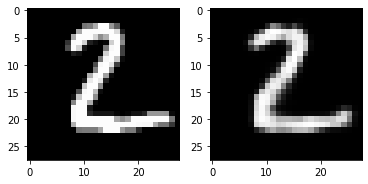

In [ ]:
predict = autoencoder_2.predict(x_test[1].reshape(1,28,28,1))
predict = np.squeeze(predict)
import matplotlib.pyplot as plt

plt.subplot(121)
plt.imshow(np.squeeze(x_test[1]), cmap='gray')
plt.subplot(122)
plt.imshow(predict, cmap='gray')
plt.show()